In [41]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\Mapped_all_ingredients_enhanced-context-corrected_final.xlsx"
df = pd.read_excel(path)

print("Shape:", df.shape)
df.head()

Shape: (3701, 24)


,original_text,name,name_confidence,amount,amount_text,unit,amount_confidence,preparation,preparation_confidence,recipe_title,...,likely_sub_category_2,likely_sub_category_2_score,main_category_2,likely_sub_category_3,likely_sub_category_3_score,main_category_3,matched_products,units,matched_categories,match_scores
0,4 tablespoons TJ’s Salted Butter,Salted Butter,0.933367,4.0,4 tablespoons,tablespoon,0.999948,NaN,NaN,Aromatic Garlic Ginger Rice,...,Butter,0.148203,Dairy & Eggs,Cool Desserts,0.145936,From The Freezer,"Butter Quarters, Salted; Cultured Salted Butte...",16 Oz; 8.8 Oz; 4 Oz,Dairy & Eggs; Dairy & Eggs; Dairy & Eggs,0.770; 0.730; 0.726
1,2 tablespoons finely chopped TJ’s Fresh Garlic,Fresh Garlic,0.942706,2.0,2 tablespoons,tablespoon,0.999844,finely chopped,0.961860,Aromatic Garlic Ginger Rice,...,"Beef, Pork & Lamb",0.045175,"Meat, Seafood & Plant-based",Spices,0.037934,For the Pantry,Garlic & Jalapeño Stuffed Olives,17.64 Oz,For the Pantry,0.735
2,1 tablespoon finely chopped TJ’s Fresh Ginger,Fresh Ginger,0.992840,1.0,1 tablespoon,tablespoon,0.999925,finely chopped,0.997657,Aromatic Garlic Ginger Rice,...,Spices,0.021007,For the Pantry,Fruits,0.010147,Fresh Fruits & Veggies,Miso Ginger Broth,32 Fl Oz,For the Pantry,0.724
3,"1 cup TJ’s Jasmine Rice, rinsed",Jasmine Rice,0.997608,1.0,1 cup,cup,0.999978,rinsed,0.998351,Aromatic Garlic Ginger Rice,...,Cereals,0.111725,For the Pantry,Spices,0.051027,For the Pantry,Jasmine Rice From Thailand,3 Lb,For the Pantry,0.951
4,2 cups hot water,hot water,0.995191,2.0,2 cups,cup,0.999965,NaN,NaN,Aromatic Garlic Ginger Rice,...,Salsa & Hot Sauce,0.109329,"Dips, Sauces & Dressings",For Baking & Cooking,0.107880,For the Pantry,NaN,NaN,NaN,NaN


In [48]:
num_recipes = df['recipe_title'].nunique()
print(f"Total unique recipes: {num_recipes}")

Total unique recipes: 555


In [49]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()
num_recipes_clean = df['recipe_title_clean'].nunique()
print(f"Total unique recipes (cleaned): {num_recipes_clean}")

Total unique recipes (cleaned): 555


count    555.000000
mean       6.668468
std        2.646092
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: original_text, dtype: float64


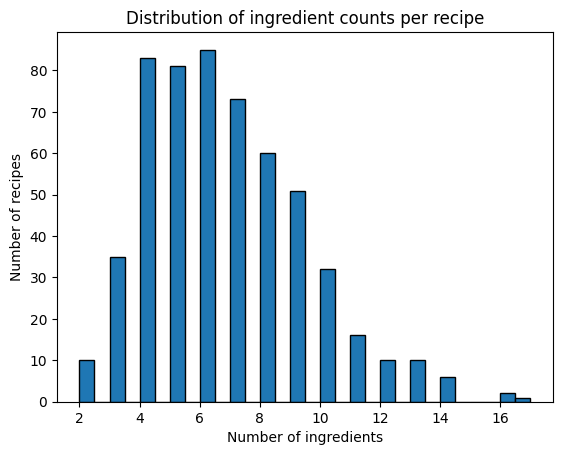

original_text
2     10
3     35
4     83
5     81
6     85
7     73
8     60
9     51
10    32
11    16
12    10
13    10
14     6
16     2
17     1
Name: count, dtype: int64


In [50]:
ingredients_per_recipe = df.groupby('recipe_title')['original_text'].count()
print(ingredients_per_recipe.describe())

ingredients_per_recipe.plot.hist(bins=30, edgecolor='black')
plt.title("Distribution of ingredient counts per recipe")
plt.xlabel("Number of ingredients")
plt.ylabel("Number of recipes")
plt.show()

ingredient_counts = ingredients_per_recipe.value_counts().sort_index()
print(ingredient_counts)

Full dataset:
count    555.000000
mean       6.668468
std        2.646092
min        2.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: original_text, dtype: float64

After filtering blank matched_products:
count    552.000000
mean       5.634058
std        2.632369
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       16.000000
Name: original_text, dtype: float64

Top 10 most common ingredients (to be excluded):
['Sea Salt', 'Unsalted Butter', 'Olive Oil', 'Garlic', 'Lemon', 'Eggs', 'Organic Cane Sugar', 'Salted Butter', 'Whole Milk', 'Organic Pure Bourbon Vanilla Extract']


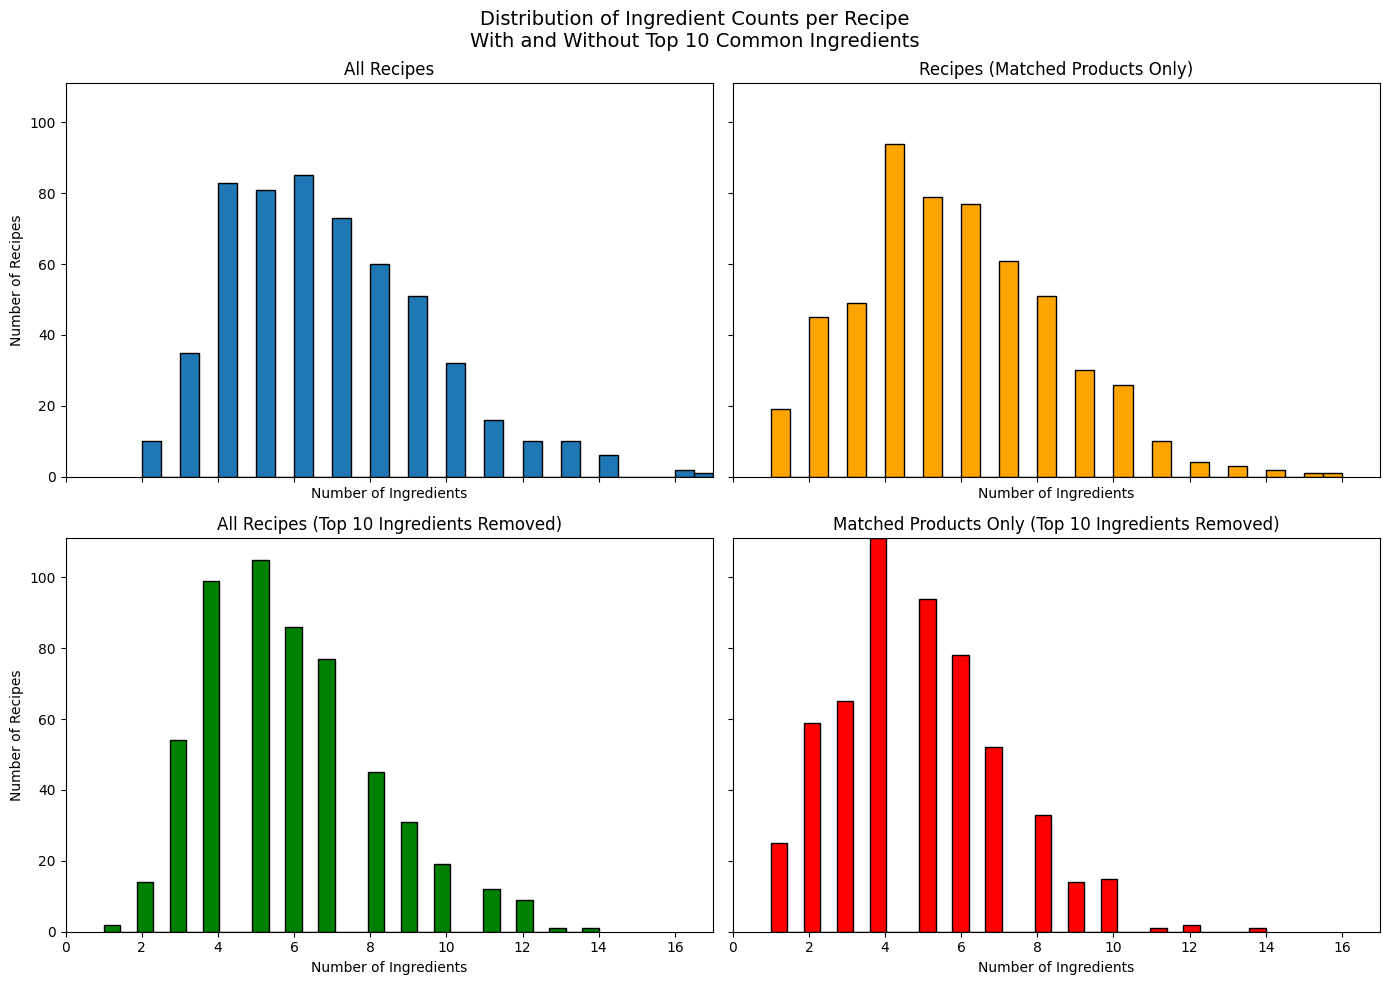

In [51]:
# --- Base ingredient counts ---
ingredients_per_recipe = df.groupby('recipe_title')['original_text'].count()

# --- Filtered dataset (only rows with matched_products) ---
df_filtered = df[~df['matched_products'].isna() & (df['matched_products'].astype(str).str.strip() != '')]
ingredients_per_recipe_filtered = df_filtered.groupby('recipe_title')['original_text'].count()

print("Full dataset:")
print(ingredients_per_recipe.describe())
print("\nAfter filtering blank matched_products:")
print(ingredients_per_recipe_filtered.describe())

top_ingredients = (
    df['name']
    .value_counts()
    .head(10)
    .index
)
print("\nTop 10 most common ingredients (to be excluded):")
print(top_ingredients.tolist())


df_no_top = df[~df['name'].isin(top_ingredients)]
df_filtered_no_top = df_filtered[~df_filtered['name'].isin(top_ingredients)]

ingredients_per_recipe_no_top = df_no_top.groupby('recipe_title')['original_text'].count()
ingredients_per_recipe_filtered_no_top = df_filtered_no_top.groupby('recipe_title')['original_text'].count()

x_max = max(
    ingredients_per_recipe.max(),
    ingredients_per_recipe_filtered.max(),
    ingredients_per_recipe_no_top.max(),
    ingredients_per_recipe_filtered_no_top.max()
)

y_max = max(
    ingredients_per_recipe.value_counts().max(),
    ingredients_per_recipe_filtered.value_counts().max(),
    ingredients_per_recipe_no_top.value_counts().max(),
    ingredients_per_recipe_filtered_no_top.value_counts().max()
)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

axes[0, 0].hist(ingredients_per_recipe, bins=30, edgecolor='black')
axes[0, 0].set_title("All Recipes")
axes[0, 0].set_xlabel("Number of Ingredients")
axes[0, 0].set_ylabel("Number of Recipes")

axes[0, 1].hist(ingredients_per_recipe_filtered, bins=30, edgecolor='black', color='orange')
axes[0, 1].set_title("Recipes (Matched Products Only)")
axes[0, 1].set_xlabel("Number of Ingredients")

axes[1, 0].hist(ingredients_per_recipe_no_top, bins=30, edgecolor='black', color='green')
axes[1, 0].set_title("All Recipes (Top 10 Ingredients Removed)")
axes[1, 0].set_xlabel("Number of Ingredients")
axes[1, 0].set_ylabel("Number of Recipes")

axes[1, 1].hist(ingredients_per_recipe_filtered_no_top, bins=30, edgecolor='black', color='red')
axes[1, 1].set_title("Matched Products Only (Top 10 Ingredients Removed)")
axes[1, 1].set_xlabel("Number of Ingredients")

for ax in axes.flat:
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)

plt.suptitle("Distribution of Ingredient Counts per Recipe\nWith and Without Top 10 Common Ingredients", fontsize=14)
plt.tight_layout()

In [52]:
dup_within_recipe = df.groupby('recipe_title')['name'].apply(
    lambda x: x.duplicated().sum()
)
print(f"Average duplicate ingredients per recipe: {dup_within_recipe.mean():.2f}")

Average duplicate ingredients per recipe: 0.01


In [53]:
ingredient_overlap = df['name'].nunique()
print(f"Unique ingredient names overall: {ingredient_overlap}")
total_ingredients = len(df)
print(f"Total ingredient entries: {total_ingredients}")
print(f"Ingredients reused across recipes: {total_ingredients - ingredient_overlap}")

Unique ingredient names overall: 1784
Total ingredient entries: 3701
Ingredients reused across recipes: 1917


In [54]:
df_filtered = df[~df['matched_products'].isna() & (df['matched_products'].astype(str).str.strip() != '')]
print(f"Remaining rows after filtering: {len(df_filtered)} ({len(df_filtered)/len(df)*100:.1f}% of original)")


Remaining rows after filtering: 3110 (84.0% of original)


In [55]:
num_recipes_filtered = df_filtered['recipe_title'].nunique()
print(f"Unique recipes after filtering: {num_recipes_filtered}")


Unique recipes after filtering: 552


In [56]:
ingredients_per_recipe_filtered = df_filtered.groupby('recipe_title')['original_text'].count()
print(ingredients_per_recipe_filtered.describe())

count    552.000000
mean       5.634058
std        2.632369
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       16.000000
Name: original_text, dtype: float64


In [57]:
merged = (
    pd.DataFrame({
        'before': ingredients_per_recipe,
        'after': ingredients_per_recipe_filtered
    })
    .fillna(0)
)
merged['lost'] = merged['before'] - merged['after']

print("Average ingredients lost per recipe:", merged['lost'].mean())
print("Recipes that lost all ingredients:", (merged['after'] == 0).sum())


Average ingredients lost per recipe: 1.0648648648648649
Recipes that lost all ingredients: 3


In [58]:
dup_within_recipe_filtered = df_filtered.groupby('recipe_title')['name'].apply(
    lambda x: x.duplicated().sum()
)
print(f"Average duplicate ingredients per recipe (after filter): {dup_within_recipe_filtered.mean():.2f}")


Average duplicate ingredients per recipe (after filter): 0.01


In [59]:
ingredient_overlap_filtered = df_filtered['name'].nunique()
total_ingredients_filtered = len(df_filtered)
print(f"Unique ingredient names overall (after filter): {ingredient_overlap_filtered}")
print(f"Total ingredient entries (after filter): {total_ingredients_filtered}")
print(f"Ingredients reused across recipes (after filter): {total_ingredients_filtered - ingredient_overlap_filtered}")


Unique ingredient names overall (after filter): 1370
Total ingredient entries (after filter): 3110
Ingredients reused across recipes (after filter): 1740


Example of most common ingredients:
name
Sea Salt                                135
Unsalted Butter                          57
Olive Oil                                41
Garlic                                   36
Lemon                                    33
Organic Cane Sugar                       30
Eggs                                     30
Salted Butter                            26
Whole Milk                               23
Organic Pure Bourbon Vanilla Extract     23
Yellow Onion                             23
Ground Black Pepper                      22
Red Onion                                21
your favorite Extra Virgin Olive Oil     21
Large Eggs                               21
your favorite Olive Oil                  20
water                                    19
Canola Oil Spray                         19
Lime                                     18
Cilantro                                 17
Name: recipe_title_clean, dtype: int64

Distribution (number of recipes → count

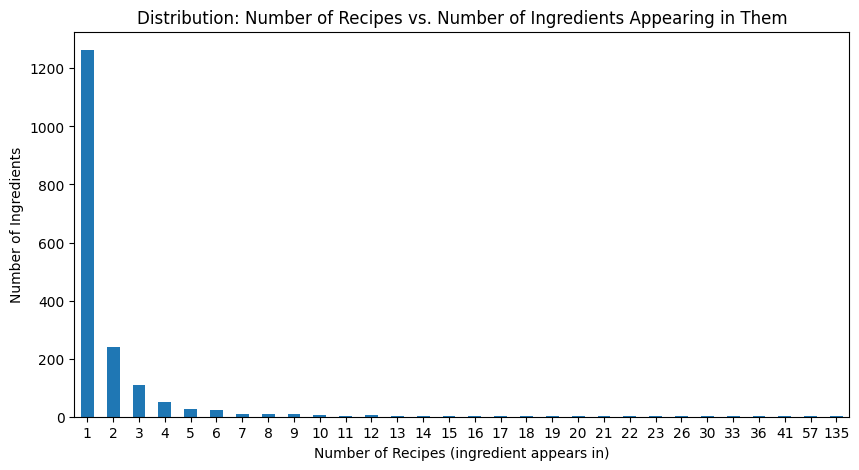

In [60]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

ingredient_recipe_counts = (
    df.groupby('name')['recipe_title_clean']
      .nunique()
      .sort_values(ascending=False)
)

print("Example of most common ingredients:")
print(ingredient_recipe_counts.head(20))

ingredient_popularity_dist = ingredient_recipe_counts.value_counts().sort_index()

print("\nDistribution (number of recipes → count of ingredients):")
print(ingredient_popularity_dist)

plt.figure(figsize=(10,5))
ingredient_popularity_dist.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. Number of Ingredients Appearing in Them")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Ingredients")
plt.xticks(rotation=0)
plt.show()


Total rows after cleaning: 3110 / 3701 (84.0% valid matched entries)

Example of most common matched products:
matched_first
Sea Salt Crystals                              155
Extra Virgin Olive Oil, Liter                  117
Pasture Raised Large Brown Eggs                 82
Seedless Lemons                                 70
Jumbo Yellow Onions                             64
Butter Quarters, Unsalted                       64
Chicken Cilantro Mini Wontons                   61
Organic Ground Black Pepper                     61
Organic Canola Oil Spray                        56
Garlic & Jalapeño Stuffed Olives                42
Organic Milk A2/A2                              38
Sicilian Selezione Extra Virgin Olive Oil       37
Organic Powdered Cane Sugar                     36
Butter Quarters, Salted                         35
Organic Low Sodium Vegetable Broth              33
Unbleached Enriched All-Purpose Flour           32
Greek Chickpeas with Cumin and Parsley          30
Organic 

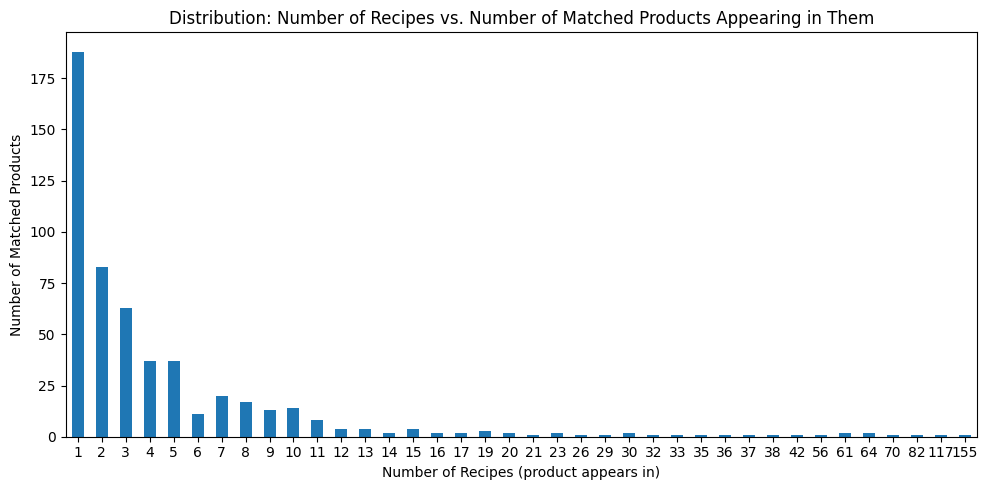

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Normalize recipe titles ---
df['recipe_title_clean'] = df['recipe_title'].astype(str).str.strip().str.lower()

# --- Extract first matched product safely ---
df['matched_first'] = (
    df['matched_products']
    .astype(str)
    .str.split(';')
    .str[0]
    .str.strip()
    .replace(['', 'nan', 'None', '[]', 'NaN'], pd.NA)  # Clean up junk values
)

# --- Keep only valid, non-null matched entries ---
df_matched = df.dropna(subset=['matched_first']).copy()

print(f"Total rows after cleaning: {len(df_matched)} / {len(df)} ({len(df_matched)/len(df)*100:.1f}% valid matched entries)")

# --- Count how many unique recipes each matched product appears in ---
ingredient_recipe_counts = (
    df_matched.groupby('matched_first')['recipe_title_clean']
      .nunique()
      .sort_values(ascending=False)
)

print("\nExample of most common matched products:")
print(ingredient_recipe_counts.head(30))

# --- Compute distribution (how many products appear in N recipes) ---
ingredient_popularity_dist = (
    ingredient_recipe_counts.value_counts()
    .sort_index()
)

print("\nDistribution (number of recipes → count of matched products):")
print(ingredient_popularity_dist)

# --- Plot ---
plt.figure(figsize=(10,5))
ingredient_popularity_dist.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. Number of Matched Products Appearing in Them")
plt.xlabel("Number of Recipes (product appears in)")
plt.ylabel("Number of Matched Products")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Excluded top 20 ingredients:
['Sea Salt', 'Unsalted Butter', 'Olive Oil', 'Garlic', 'Lemon', 'Organic Cane Sugar', 'Eggs', 'Salted Butter', 'Whole Milk', 'Organic Pure Bourbon Vanilla Extract', 'Yellow Onion', 'Ground Black Pepper', 'Red Onion', 'your favorite Extra Virgin Olive Oil', 'Large Eggs', 'your favorite Olive Oil', 'water', 'Canola Oil Spray', 'Lime', 'Cilantro']

Top 10 most common ingredients (AFTER filtering top 20):
name
Egg                                      17
Extra Virgin Olive Oil                   16
Salt                                     15
Canola Oil                               14
Milk                                     14
Ground Cinnamon                          14
Parsley                                  13
Heavy Cream                              13
Unbleached Enriched All-Purpose Flour    13
Salt & Pepper                            12
Name: recipe_title_clean, dtype: int64

Distribution (number of recipes → count of ingredients, after filtering top 20):


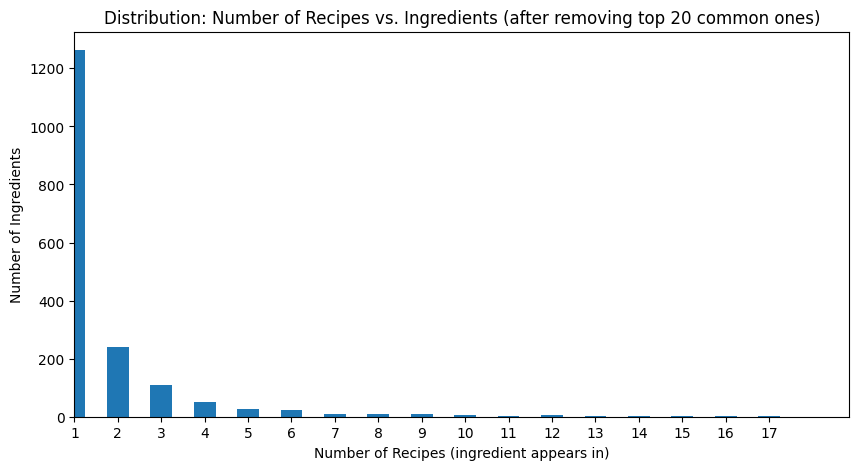

In [61]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

ingredient_recipe_counts = (
    df.groupby('name')['recipe_title_clean']
      .nunique()
      .sort_values(ascending=False)
)

excluded_ingredients = ingredient_recipe_counts.head(20).index
ingredient_recipe_counts_filtered = ingredient_recipe_counts.drop(excluded_ingredients)

print(f"Excluded top {len(excluded_ingredients)} ingredients:")
print(list(excluded_ingredients))

print("\nTop 10 most common ingredients (AFTER filtering top 20):")
print(ingredient_recipe_counts_filtered.head(10))

ingredient_popularity_dist_filtered = (
    ingredient_recipe_counts_filtered.value_counts()
    .sort_index()
)

print("\nDistribution (number of recipes → count of ingredients, after filtering top 20):")
print(ingredient_popularity_dist_filtered)

plt.figure(figsize=(10,5))
ingredient_popularity_dist_filtered.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. Ingredients (after removing top 20 common ones)")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Ingredients")
plt.xticks(rotation=0)

plt.xlim(0, ingredient_popularity_dist_filtered.index.max() * 1.05)
plt.show()


In [62]:
df['recipe_title_clean'] = df['recipe_title'].str.strip().str.lower()

df_no_match = df[df['matched_products'].isna() | (df['matched_products'].astype(str).str.strip() == '')]

print(f"Total rows without matched products: {len(df_no_match)} ({len(df_no_match)/len(df)*100:.1f}% of dataset)")

ingredient_recipe_counts_no_match = (
    df_no_match.groupby('name')['recipe_title_clean']
        .nunique()
        .sort_values(ascending=False)
)

print("\nExample of most common UNMATCHED ingredients:")
print(ingredient_recipe_counts_no_match.head(20))

ingredient_popularity_dist_no_match = (
    ingredient_recipe_counts_no_match.value_counts()
        .sort_index()
)

print("\nDistribution (number of recipes → count of UNMATCHED ingredients):")
print(ingredient_popularity_dist_no_match)
-
plt.figure(figsize=(10,5))
ingredient_popularity_dist_no_match.plot(kind='bar')
plt.title("Distribution: Number of Recipes vs. UNMATCHED Ingredients Appearing in Them")
plt.xlabel("Number of Recipes (ingredient appears in)")
plt.ylabel("Number of Unmatched Ingredients")
plt.xticks(rotation=0)
plt.show()


SyntaxError: invalid syntax (2853330437.py, line 23)

Ingredients file: (3701, 24)
Catalog file: (1302, 8)
                 category sub_category       product_name
0  Fresh Fruits & Veggies       Fruits  Sugar Sweet Melon
1  Fresh Fruits & Veggies       Fruits     Saturn Peaches
2  Fresh Fruits & Veggies       Fruits    Fruitful Medley
3  Fresh Fruits & Veggies       Fruits    Seedless Lemons
4  Fresh Fruits & Veggies       Fruits       Hass Avocado
Matched rows with at least one product: 3701
Rows successfully matched to catalog: 1614

Example merged rows:
                                       matched_first  \
0                   Garlic & Jalapeño Stuffed Olives   
1                                  Miso Ginger Broth   
2                         Jasmine Rice From Thailand   
3                          Chicken Broth Concentrate   
4  TJ's Mushroom & Company Multipurpose Umami Sea...   

                                        product_name  \
0                   Garlic & Jalapeño Stuffed Olives   
1                                  Miso 

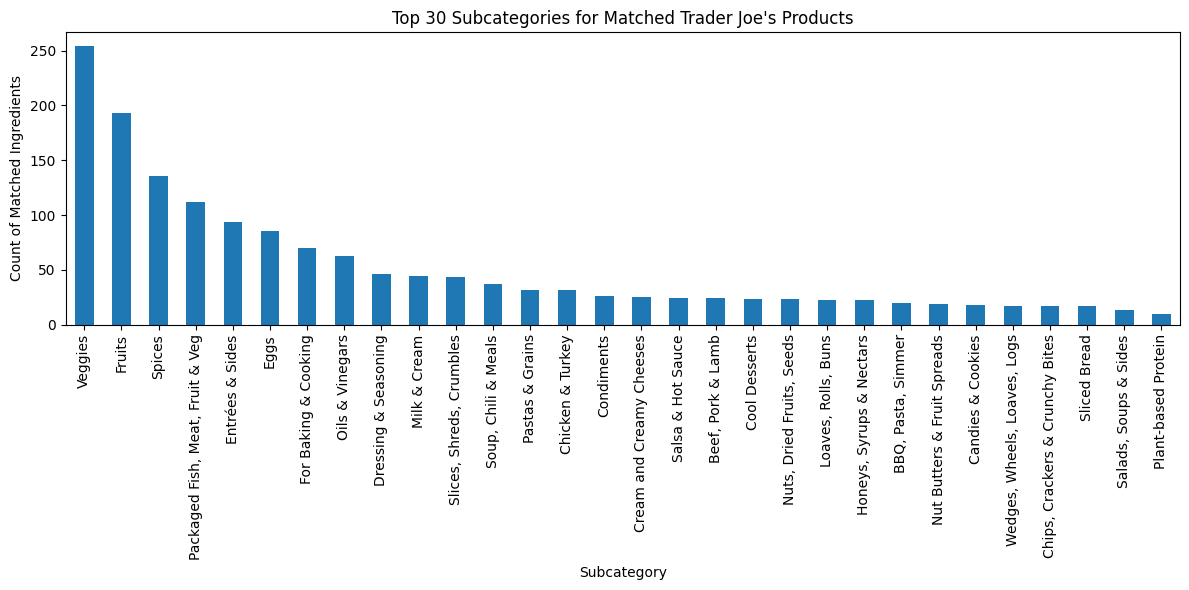

In [73]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

path_ingredients = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\Mapped_all_ingredients_enhanced-context-corrected_final.xlsx"
path_catalog = r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\data\trader_joes_products_v3_with_shelf_life.csv"

df = pd.read_excel(path_ingredients)
catalog = pd.read_csv(path_catalog)

print(f"Ingredients file: {df.shape}")
print(f"Catalog file: {catalog.shape}")
print(catalog[['category', 'sub_category', 'product_name']].head())

df['matched_first'] = (
    df['matched_products']
    .astype(str)
    .str.split(',')
    .str[0]
    .str.strip()
)

df_matched = df[df['matched_first'].notna() & (df['matched_first'] != '')]

print(f"Matched rows with at least one product: {len(df_matched)}")

merged = pd.merge(
    df_matched,
    catalog,
    left_on='matched_first',
    right_on='product_name',
    how='inner'
)

print(f"Rows successfully matched to catalog: {len(merged)}")
print("\nExample merged rows:")
print(merged[['matched_first', 'product_name', 'sub_category', 'category']].head())

subcat_counts = (
    merged['sub_category']
    .value_counts()
    .sort_values(ascending=False)
)

print("\nTop subcategories:")
print(subcat_counts.head(20))

plt.figure(figsize=(12,6))
subcat_counts.head(30).plot(kind='bar')
plt.title("Top 30 Subcategories for Matched Trader Joe's Products")
plt.xlabel("Subcategory")
plt.ylabel("Count of Matched Ingredients")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Average number of recipes each subcategory's ingredients appear in:
sub_category
Eggs                                28.333333
Milk & Cream                        10.750000
Fruits                               9.894737
Yogurt                               9.000000
Spices                               7.555556
Oils & Vinegars                      7.000000
Packaged Fish, Meat, Fruit & Veg     5.842105
Veggies                              5.825000
Sliced Bread                         5.666667
Honeys, Syrups & Nectars             5.500000
Soup, Chili & Meals                  5.285714
Butter                               5.000000
Bagels                               5.000000
For Baking & Cooking                 4.857143
Entrées & Sides                      4.650000
Condiments                           4.333333
Dressing & Seasoning                 4.181818
Cream and Creamy Cheeses             3.571429
Slices, Shreds, Crumbles             3.307692
Pastas & Grains                      2.90909

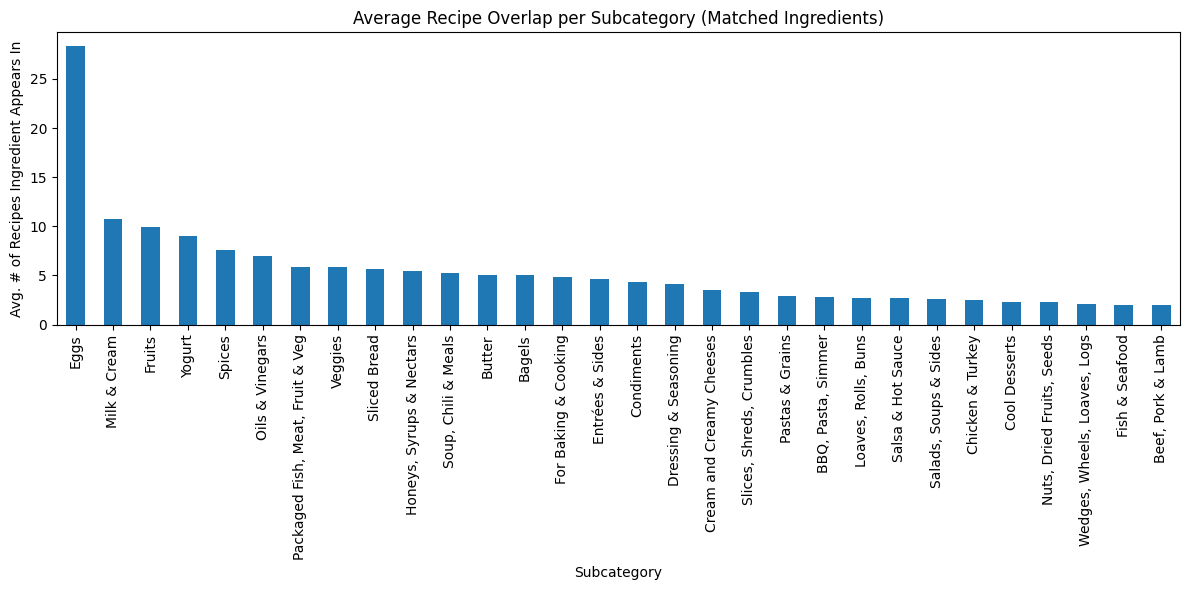

In [74]:
merged['recipe_title_clean'] = merged['recipe_title'].str.strip().str.lower()

ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

merged_overlap = pd.merge(
    ingredient_overlap,
    merged[['matched_first', 'sub_category', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

subcategory_overlap = (
    merged_overlap.groupby('sub_category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each subcategory's ingredients appear in:")
print(subcategory_overlap.head(20))

plt.figure(figsize=(12,6))
subcategory_overlap.head(30).plot(kind='bar')
plt.title("Average Recipe Overlap per Subcategory (Matched Ingredients)")
plt.xlabel("Subcategory")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Average number of recipes each CATEGORY's ingredients appear in:
category
Dairy & Eggs                   15.777778
Fresh Fruits & Veggies          7.135593
For the Pantry                  5.157895
From The Freezer                3.416667
Cheese                          3.035714
Dips, Sauces & Dressings        3.024390
Bakery                          2.888889
Meat, Seafood & Plant-based     2.187500
Fresh Prepared Foods            2.000000
Snacks & Sweets                 1.812500
Name: recipe_count, dtype: float64


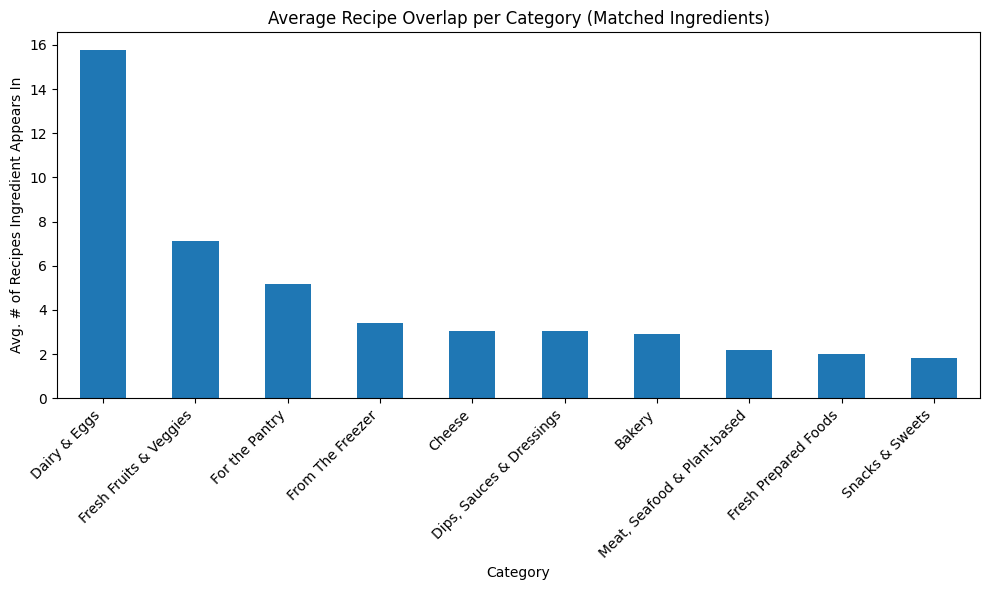

In [75]:
ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

merged_overlap = pd.merge(
    ingredient_overlap,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

category_overlap = (
    merged_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's ingredients appear in:")
print(category_overlap)

plt.figure(figsize=(10,6))
category_overlap.plot(kind='bar')
plt.title("Average Recipe Overlap per Category (Matched Ingredients)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Average number of recipes each CATEGORY's matched products appear in:
category
Dairy & Eggs                   5.714286
From The Freezer               4.850000
For the Pantry                 4.521739
Fresh Fruits & Veggies         4.145833
Dips, Sauces & Dressings       2.684211
Cheese                         2.600000
Meat, Seafood & Plant-based    2.086957
Bakery                         2.071429
Fresh Prepared Foods           1.800000
Snacks & Sweets                1.782609
Name: recipe_count, dtype: float64


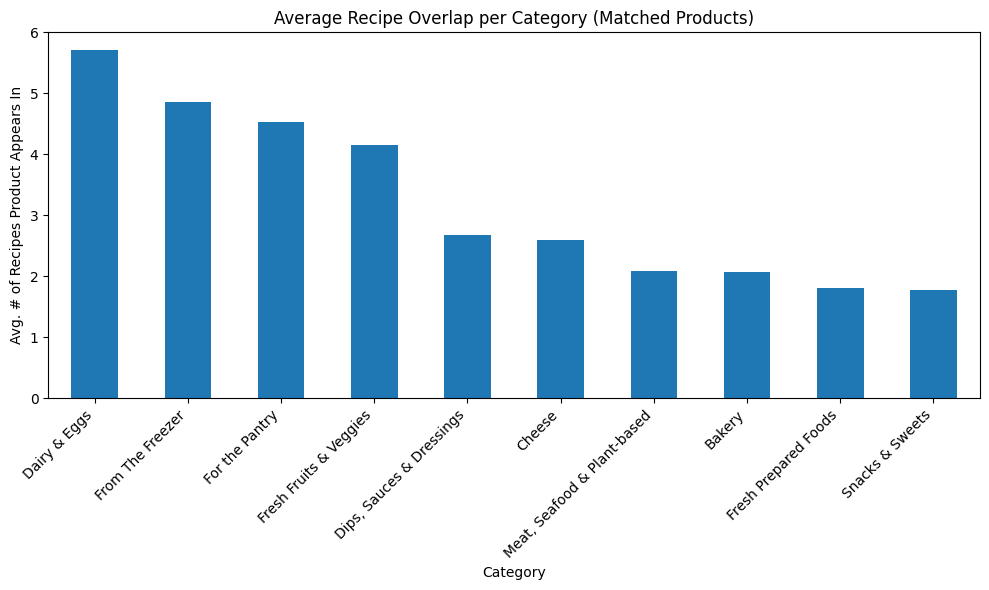

In [71]:
# --- Compute matched product overlap (number of unique recipes each product appears in) ---
product_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

# --- Merge category info ---
merged_product_overlap = pd.merge(
    product_overlap,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

# --- Compute average recipe overlap by category ---
category_product_overlap = (
    merged_product_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's matched products appear in:")
print(category_product_overlap)

# --- Plot the average product overlap by category ---
plt.figure(figsize=(10,6))
category_product_overlap.plot(kind='bar')
plt.title("Average Recipe Overlap per Category (Matched Products)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Product Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [66]:
category_counts = merged_overlap['category'].value_counts()

category_summary = pd.DataFrame({
    'avg_recipe_overlap': category_overlap,
    'ingredient_count': category_counts
}).sort_values('avg_recipe_overlap', ascending=False)

print(category_summary.head(10))

                             avg_recipe_overlap  ingredient_count
category                                                         
Dairy & Eggs                           5.714286                 7
From The Freezer                       4.850000                20
For the Pantry                         4.521739                92
Fresh Fruits & Veggies                 4.145833                48
Dips, Sauces & Dressings               2.684211                19
Cheese                                 2.600000                15
Meat, Seafood & Plant-based            2.086957                23
Bakery                                 2.071429                14
Fresh Prepared Foods                   1.800000                 5
Snacks & Sweets                        1.782609                23


Top 10 overlapping ingredients (removed):
                                         matched_first  recipe_count
36                       Chicken Cilantro Mini Wontons            54
138                           Organic Canola Oil Spray            36
87              Greek Chickpeas with Cumin and Parsley            30
151                        Organic Ground Black Pepper            29
84                          Gourmet Fried Onion Pieces            24
146  Organic Diced & Fire Roasted Tomatoes with Gre...            21
91                                        Green Onions            19
140             Organic Coconut Aminos Seasoning Sauce            16
96                                        Hass Avocado            15
77                    Garlic & Jalapeño Stuffed Olives            14

Average number of recipes each CATEGORY's ingredients appear in (after filtering top 10):
category
Dairy & Eggs                   5.714286
Fresh Fruits & Veggies         3.586957
For the Pantry     

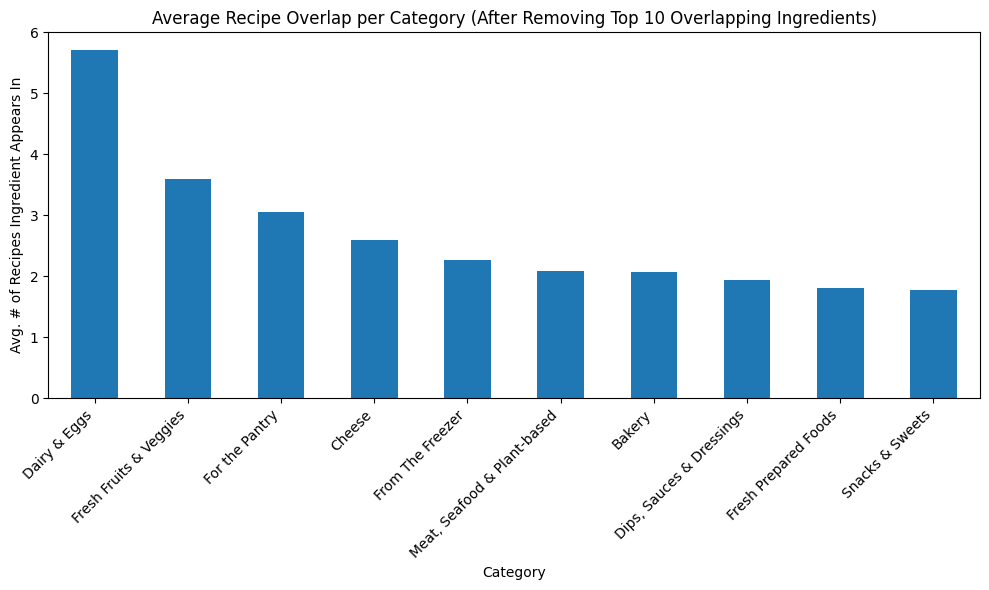

In [67]:
ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

top_overlap = ingredient_overlap.nlargest(10, 'recipe_count')
print("Top 10 overlapping ingredients (removed):")
print(top_overlap)

ingredient_overlap_filtered = ingredient_overlap[~ingredient_overlap['matched_first'].isin(top_overlap['matched_first'])]

merged_overlap = pd.merge(
    ingredient_overlap_filtered,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

category_overlap_filtered = (
    merged_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's ingredients appear in (after filtering top 10):")
print(category_overlap_filtered)

plt.figure(figsize=(10,6))
category_overlap_filtered.plot(kind='bar')
plt.title("Average Recipe Overlap per Category (After Removing Top 10 Overlapping Ingredients)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 overlapping ingredients (removed):
                                         matched_first  recipe_count
36                       Chicken Cilantro Mini Wontons            54
138                           Organic Canola Oil Spray            36
87              Greek Chickpeas with Cumin and Parsley            30
151                        Organic Ground Black Pepper            29
84                          Gourmet Fried Onion Pieces            24
146  Organic Diced & Fire Roasted Tomatoes with Gre...            21
91                                        Green Onions            19
140             Organic Coconut Aminos Seasoning Sauce            16
96                                        Hass Avocado            15
77                    Garlic & Jalapeño Stuffed Olives            14

Remaining ingredients after filtering (overlap > 1): 139

Average number of recipes each CATEGORY's ingredients appear in
(after removing top 10 & singletons):
category
Dairy & Eggs                 

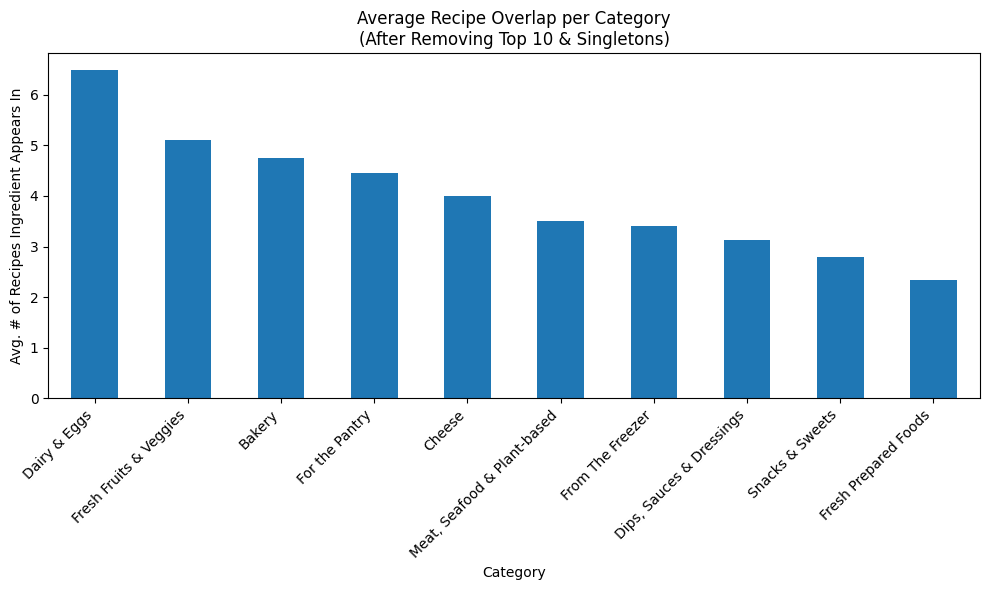

In [68]:
# --- Compute ingredient overlap (unique recipes per ingredient) ---
ingredient_overlap = (
    merged.groupby('matched_first')['recipe_title_clean']
    .nunique()
    .reset_index(name='recipe_count')
)

# --- Remove top 10 most overlapping ingredients ---
top_overlap = ingredient_overlap.nlargest(10, 'recipe_count')
print("Top 10 overlapping ingredients (removed):")
print(top_overlap)

ingredient_overlap_filtered = ingredient_overlap[
    ~ingredient_overlap['matched_first'].isin(top_overlap['matched_first'])
]

# --- ✅ Filter out items that have 0 or 1 overlap (i.e., appear in only one recipe) ---
ingredient_overlap_filtered = ingredient_overlap_filtered[ingredient_overlap_filtered['recipe_count'] > 1]

print(f"\nRemaining ingredients after filtering (overlap > 1): {len(ingredient_overlap_filtered)}")

# --- Merge category info back in ---
merged_overlap = pd.merge(
    ingredient_overlap_filtered,
    merged[['matched_first', 'category']].drop_duplicates(),
    on='matched_first',
    how='left'
)

# --- Compute average recipe overlap by category ---
category_overlap_filtered = (
    merged_overlap.groupby('category')['recipe_count']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage number of recipes each CATEGORY's ingredients appear in\n(after removing top 10 & singletons):")
print(category_overlap_filtered)

# --- Plot ---
plt.figure(figsize=(10,6))
category_overlap_filtered.plot(kind='bar')
plt.title("Average Recipe Overlap per Category\n(After Removing Top 10 & Singletons)")
plt.xlabel("Category")
plt.ylabel("Avg. # of Recipes Ingredient Appears In")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [93]:
import re
import pandas as pd

# --- Helper: robust cleaner for semicolon lists ---
BAD_STRINGS = {"nan", "none", "[]", "[nan]", "(nan)", "na", "null"}

def normalize_semicolon_list(s: object) -> str:
    """
    Return a cleaned string of items separated by ';'.
    - Treats NaN/None/'nan'/'None'/[] etc. as blank
    - Strips whitespace
    - Removes leading/trailing semicolons
    - Collapses duplicate delimiters ;; and strips spaces around ;
    """
    if pd.isna(s):
        return ""
    s = str(s).strip()
    if s.lower() in BAD_STRINGS:
        return ""
    # Replace repeated semicolons with a single one
    s = re.sub(r";{2,}", ";", s)
    # Remove spaces around semicolons
    s = re.sub(r"\s*;\s*", ";", s)
    # Strip leading/trailing semicolons/spaces
    s = s.strip(" ;")
    # If after cleaning it's one of the "bad" markers or empty, blank it
    if not s or s.lower() in BAD_STRINGS:
        return ""
    return s

def first_item(s: str) -> str:
    if not s:
        return ""
    return s.split(";")[0].strip()

# --- Create CLEAN columns and recompute everything from them ---
df_orig['matched_product_clean']  = df_orig['matched_products'].apply(normalize_semicolon_list)
df_final['matched_product_clean'] = df_final['matched_products'].apply(normalize_semicolon_list)

# Unmatched counts (use the CLEAN columns!)
unmatched_orig  = (df_orig['matched_product_clean']  == "").sum()
unmatched_final = (df_final['matched_product_clean'] == "").sum()
print(f"\nUnmatched in original: {unmatched_orig} / {len(df_orig)} ({unmatched_orig/len(df_orig)*100:.1f}%)")
print(f"Unmatched in final: {unmatched_final} / {len(df_final)} ({unmatched_final/len(df_final)*100:.1f}%)")

# First items from the CLEAN columns
df_orig['first_match']  = df_orig['matched_product_clean'].apply(first_item)
df_final['first_match'] = df_final['matched_product_clean'].apply(first_item)

# Build merged from CLEAN columns only
merged = pd.DataFrame({
    'matched_product_orig':  df_orig['matched_product_clean'],
    'matched_product_final': df_final['matched_product_clean'],
    'first_match_orig':      df_orig['first_match'],
    'first_match_final':     df_final['first_match'],
})

# "final first appears anywhere in original list" using CLEAN col
def first_in_original_list(row):
    orig_list = [x for x in row['matched_product_orig'].split(";") if x]
    fm = row['first_match_final']
    return bool(fm) and (fm in orig_list)

merged['first_in_orig_list'] = merged.apply(first_in_original_list, axis=1)

# Correct/incorrect flags (use CLEAN firsts)
merged['exact_match']   = (merged['first_match_orig'] == merged['first_match_final']) & (merged['first_match_final'] != "")
merged['both_nonempty'] = (merged['first_match_orig'] != "") & (merged['first_match_final'] != "")
merged['incorrect_first'] = merged['both_nonempty'] & ~merged['exact_match']

# Blank transitions (use CLEAN columns!)
merged['was_blank_orig'] = merged['matched_product_orig'].eq("")
merged['is_blank_final'] = merged['matched_product_final'].eq("")
merged['fixed_blank']    = merged['was_blank_orig'] & ~merged['is_blank_final']
merged['lost_match']     = ~merged['was_blank_orig'] & merged['is_blank_final']

# --- Counts ---
num_fixed_blank = merged['fixed_blank'].sum()
num_lost_match  = merged['lost_match'].sum()
print(f"\nFixed blanks (was blank → now matched): {num_fixed_blank} / {len(merged)} ({num_fixed_blank/len(merged)*100:.1f}%)")
print(f"Lost matches (was matched → now blank): {num_lost_match} / {len(merged)} ({num_lost_match/len(merged)*100:.1f}%)")

num_exact     = merged['exact_match'].sum()
num_in_list   = merged['first_in_orig_list'].sum()
num_incorrect = merged['incorrect_first'].sum()
print(f"\nExact same first-item matches: {num_exact} / {len(merged)} ({num_exact/len(merged)*100:.1f}%)")
print(f"Final's first item appears somewhere in original list: {num_in_list} / {len(merged)} ({num_in_list/len(merged)*100:.1f}%)")
print(f"Incorrect first-item matches: {num_incorrect} / {len(merged)} ({num_incorrect/len(merged)*100:.1f}%)")

# --- Unique product metrics ---
unique_exact_correct  = merged.loc[merged['exact_match'],        'first_match_final'].nunique()
unique_in_list_correct= merged.loc[merged['first_in_orig_list'], 'first_match_final'].nunique()
unique_incorrect      = merged.loc[merged['incorrect_first'],    'first_match_final'].nunique()
print(f"\nUnique correctly matched products (exact first): {unique_exact_correct}")
print(f"Unique correctly matched products (appears anywhere in list): {unique_in_list_correct}")
print(f"Unique incorrectly matched products (wrong first match): {unique_incorrect}")

# --- Unique product accuracy breakdown ---
total_unique_final = merged['first_match_final'].replace("", pd.NA).dropna().nunique()
unique_exact_pct   = (unique_exact_correct   / total_unique_final * 100) if total_unique_final else 0
unique_in_list_pct = (unique_in_list_correct / total_unique_final * 100) if total_unique_final else 0
unique_incorrect_pct = (unique_incorrect     / total_unique_final * 100) if total_unique_final else 0

print("\n--- Unique Product Accuracy Breakdown ---")
print(f"Total unique products (final, non-blank): {total_unique_final}")
print(f"Exact correct (unique): {unique_exact_correct} ({unique_exact_pct:.1f}%)")
print(f"In-list correct (unique): {unique_in_list_correct} ({unique_in_list_pct:.1f}%)")
print(f"Incorrect (unique): {unique_incorrect} ({unique_incorrect_pct:.1f}%)")



Unmatched in original: 885 / 3701 (23.9%)
Unmatched in final: 591 / 3701 (16.0%)

Fixed blanks (was blank → now matched): 338 / 3701 (9.1%)
Lost matches (was matched → now blank): 44 / 3701 (1.2%)

Exact same first-item matches: 2265 / 3701 (61.2%)
Final's first item appears somewhere in original list: 2395 / 3701 (64.7%)
Incorrect first-item matches: 507 / 3701 (13.7%)

Unique correctly matched products (exact first): 446
Unique correctly matched products (appears anywhere in list): 454
Unique incorrectly matched products (wrong first match): 94

--- Unique Product Accuracy Breakdown ---
Total unique products (final, non-blank): 537
Exact correct (unique): 446 (83.1%)
In-list correct (unique): 454 (84.5%)
Incorrect (unique): 94 (17.5%)


In [ ]:
# --- Plot both side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))
category_counts.head(15).plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title("Ingredient Count per Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)

category_avg_score.head(15).plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title("Average Match Score per Category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Avg. Match Score")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()